In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import spacy
import wordcloud
nlp= spacy.load('en_core_web_sm')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import re

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptro

True

In [7]:
df= pd.read_csv('/content/dataset -P543.csv',on_bad_lines='skip',encoding='latin-1')

In [8]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [10]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
# Combine title and body into one text column
df['text'] = df['title'] + " " + df['body']

In [12]:
#So it removes:
#Emojis (😊, 🤔, etc.)
#Numbers (123)
#Special characters (!, @, #, etc.)
#Punctuation (., ?, etc.)
#Non-English characters
# Define a function to clean and preprocess text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] #Converts word to Dictionary Form
    return " ".join(tokens)

In [13]:
# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

In [14]:
# Show a few examples of cleaned text
df[['text', 'cleaned_text']]

,text,cleaned_text
0,Horrible product Very disappointed with the ov...,horrible product disappointed overall performa...
1,Camera quality is not like 48 megapixel Camera...,camera quality like megapixel camera quality low
2,"Overall Got the mobile on the launch date,Batt...",overall got mobile launch datebattery must app...
3,A big no from me 1. It doesn't work with 5.0GH...,big doesnt work ghz wifi frequency ghz old sch...
4,Put your money somewhere else Not worth buying...,put money somewhere else worth buyingfaulty so...
...,...,...
1435,Excellent mobile Excellent mobile,excellent mobile excellent mobile
1436,Never expected from samsung All over mobile pe...,never expected samsung mobile performance poor...
1437,Good value for money Battery life is good but ...,good value money battery life good camera clar...
1438,Unreal and whitish display It's a very bad pro...,unreal whitish display bad product highly diss...


In [15]:
df['cleaned_text'][9]

'dont buy amazon poor quality camera found box seal damage still amazon taking backwaste moneyphone slowdont buy amazonnow amazon started cheating customer make profit'

In [16]:
# Create an empty list to store sentences and their ratings
sentence_data = []

In [17]:
#Iterate through the original DataFrame and increases accuracy score
for index, row in df.iterrows():
  rating = row['rating']  # Get the rating for the current document
  text = row['cleaned_text'] # Get the cleaned text for the current document
  sentences = sent_tokenize(text) # Tokenize the text into sentences
  # For each sentence in the document, append it and its rating to the list
  for sent in sentences:
    sentence_data.append({'text': sent, 'rating': rating})

In [18]:
#Create the DataFrame from the list of dictionaries
sent_df = pd.DataFrame(sentence_data)
# Display the first few rows to verify
display(sent_df.head())

,text,rating
0,horrible product disappointed overall performa...,1
1,camera quality like megapixel camera quality low,3
2,overall got mobile launch datebattery must app...,4
3,big doesnt work ghz wifi frequency ghz old sch...,1
4,put money somewhere else worth buyingfaulty so...,1


In [19]:
sent_df

,text,rating
0,horrible product disappointed overall performa...,1
1,camera quality like megapixel camera quality low,3
2,overall got mobile launch datebattery must app...,4
3,big doesnt work ghz wifi frequency ghz old sch...,1
4,put money somewhere else worth buyingfaulty so...,1
...,...,...
1433,excellent mobile excellent mobile,5
1434,never expected samsung mobile performance poor...,1
1435,good value money battery life good camera clar...,5
1436,unreal whitish display bad product highly diss...,1


In [20]:
def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [21]:
df['sentiment'] = df['rating'].apply(label_sentiment)

In [22]:
df.head()

,title,rating,body,text,cleaned_text,sentiment
0,Horrible product,1,Very disappointed with the overall performance...,Horrible product Very disappointed with the ov...,horrible product disappointed overall performa...,negative
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Camera quality is not like 48 megapixel Camera...,camera quality like megapixel camera quality low,neutral
2,Overall,4,"Got the mobile on the launch date,Battery must...","Overall Got the mobile on the launch date,Batt...",overall got mobile launch datebattery must app...,positive
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,A big no from me 1. It doesn't work with 5.0GH...,big doesnt work ghz wifi frequency ghz old sch...,negative
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Put your money somewhere else Not worth buying...,put money somewhere else worth buyingfaulty so...,negative


In [23]:
df.isnull().sum()

,0
title,0
rating,0
body,0
text,0
cleaned_text,0
sentiment,0


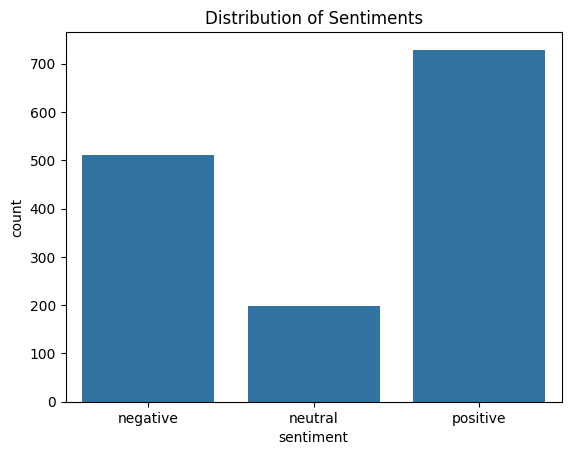

In [24]:
sns.countplot(data=df, x='sentiment')
plt.title("Distribution of Sentiments")
plt.show()

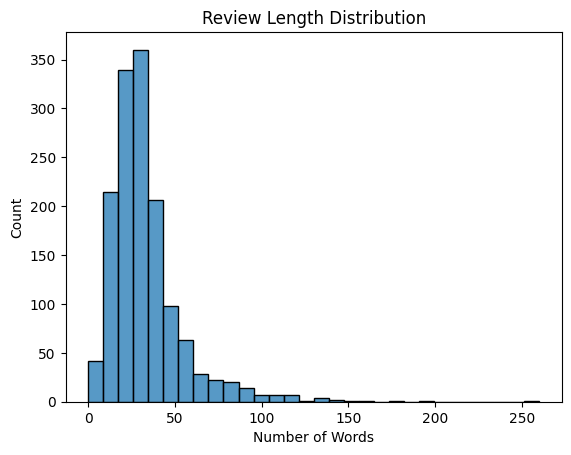

In [25]:
df['review_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.show()

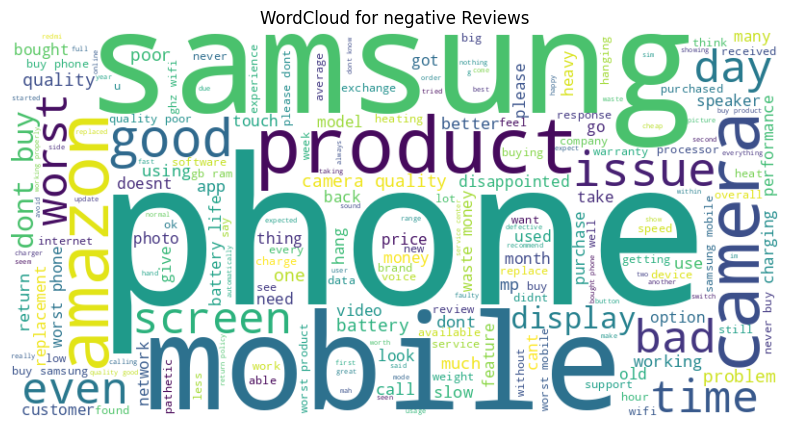

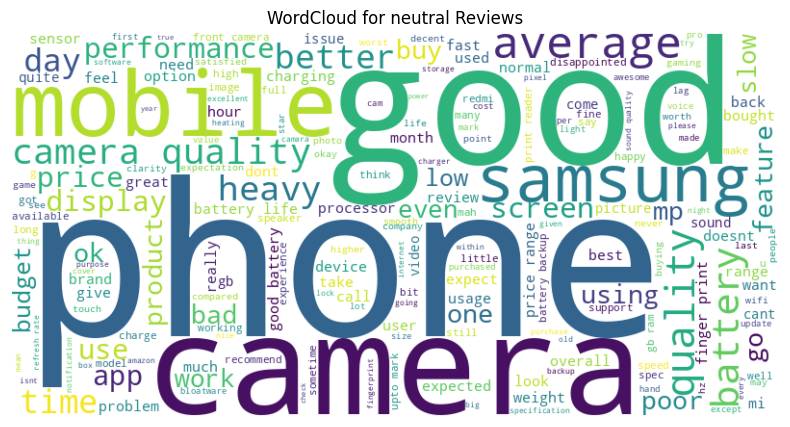

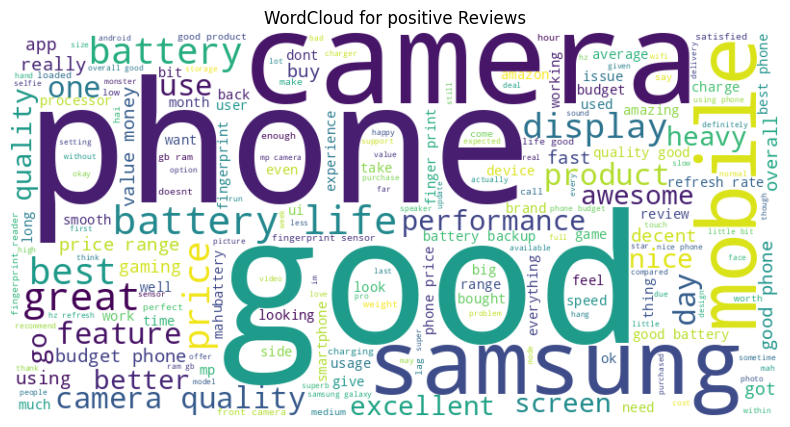

In [26]:
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Reviews')
    plt.show()

In [27]:
most_common_rating = df['rating'].mode()[0]
print(f"The most frequent rating given by customers is: {most_common_rating}")

# we can  can also see the frequency of each rating
rating_counts = df['rating'].value_counts()
print("\nFrequency of each rating:")
rating_counts

The most frequent rating given by customers is: 5

Frequency of each rating:


,count
rating,
5,419
1,386
4,310
3,199
2,126


In [28]:
# finding the mean values of ratings
if 'rating' in df.columns:
    mean_of_rating = df['rating'].mean()
    print(f"The mean rating given by customers is: {mean_of_rating}")
else:
    print("The DataFrame does not contain a 'rating' column. Please check the column names.")
print("\033[94m*****This ratings tells us that The eproduct is above Average*****\033[0m")

The mean rating given by customers is: 3.173611111111111
*****This ratings tells us that The eproduct is above Average*****


In [40]:
sent_df=df[['text','rating','sentiment']]

In [41]:
sent_df.head()

,text,rating,sentiment
0,Horrible product Very disappointed with the ov...,1,negative
1,Camera quality is not like 48 megapixel Camera...,3,neutral
2,"Overall Got the mobile on the launch date,Batt...",4,positive
3,A big no from me 1. It doesn't work with 5.0GH...,1,negative
4,Put your money somewhere else Not worth buying...,1,negative


In [64]:
count=CountVectorizer(analyzer=clean_text)

In [65]:
sent_df

,text,rating,sentiment
0,Horrible product Very disappointed with the ov...,1,negative
1,Camera quality is not like 48 megapixel Camera...,3,neutral
2,"Overall Got the mobile on the launch date,Batt...",4,positive
3,A big no from me 1. It doesn't work with 5.0GH...,1,negative
4,Put your money somewhere else Not worth buying...,1,negative
...,...,...,...
1435,Excellent mobile Excellent mobile,5,positive
1436,Never expected from samsung All over mobile pe...,1,negative
1437,Good value for money Battery life is good but ...,5,positive
1438,Unreal and whitish display It's a very bad pro...,1,negative


In [66]:
#x=count.fit_transform(sent_df['text'])

In [67]:
#x.toarray()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
tfidf= TfidfVectorizer()

In [72]:
y= tfidf.fit_transform(sent_df['text'])

In [73]:
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
multi= MultinomialNB()

In [75]:
multi.fit(y,sent_df['sentiment'])

MultinomialNB()

In [76]:
y_pred= multi.predict(y)

In [77]:
accuracy_score(sent_df['sentiment'],y_pred)

0.7770833333333333

In [78]:
x_train,x_test,y_train,y_test=train_test_split(y,sent_df['sentiment'],train_size=0.90,random_state=100)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 5893)
(144, 5893)
(1296,)
(144,)


In [80]:
y_pred1= multi.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred1)

0.8055555555555556

In [82]:
#svm
from sklearn.svm import SVC

In [83]:
svc=SVC()

In [84]:
svc.fit(x_train,y_train)

SVC()

In [87]:
# training validation
y_pred2=svc.predict(x_train)

In [88]:
accuracy_score(y_pred2,y_train)

0.9822530864197531

In [90]:
# testing validation
y_pred_scv_test=svc.predict(x_test)

In [91]:
accuracy_score(y_pred_scv_test,y_test)

0.7986111111111112

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr=LogisticRegression()

In [94]:
lr.fit(x_train,y_train)

LogisticRegression()

In [95]:
# training validation
lr_pred=lr.predict(x_train)
accuracy_score(y_train,lr_pred)

0.8935185185185185

In [96]:
# testing validation
lr_pred=lr.predict(x_test)
lr_score=accuracy_score(y_test,lr_pred)
lr_score

0.8194444444444444

In [98]:
#  knn medel

from sklearn.neighbors import KNeighborsClassifier

# Do KNN model
knn = KNeighborsClassifier(n_neighbors=) # You can adjust n_neighbors
knn.fit(x_train, y_train)

# Training validation
y_pred_knn_train = knn.predict(x_train)
print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_knn_train)}")

# Testing validation
y_pred_knn_test = knn.predict(x_test)
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn_test)}")

KNN Training Accuracy: 0.36419753086419754
KNN Testing Accuracy: 0.4097222222222222


In [99]:
# random forest

from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=100) # You can adjust n_estimators
rf.fit(x_train, y_train)

# Training validation
y_pred_rf_train = rf.predict(x_train)
print(f"Random Forest Training Accuracy: {accuracy_score(y_train, y_pred_rf_train)}")

# Testing validation
y_pred_rf_test = rf.predict(x_test)
print(f"Random Forest Testing Accuracy: {accuracy_score(y_test, y_pred_rf_test)}")

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.8055555555555556


In [101]:
#  decision tree

from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier(random_state=100) # You can adjust other parameters
dt.fit(x_train, y_train)

# Training validation
y_pred_dt_train = dt.predict(x_train)
print(f"Decision Tree Training Accuracy: {accuracy_score(y_train, y_pred_dt_train)}")

# Testing validation
y_pred_dt_test = dt.predict(x_test)
print(f"Decision Tree Testing Accuracy: {accuracy_score(y_test, y_pred_dt_test)}")

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.7013888888888888
